In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ekaterina.sergeeva/Documents/dataset.csv')
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [3]:
print(df.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

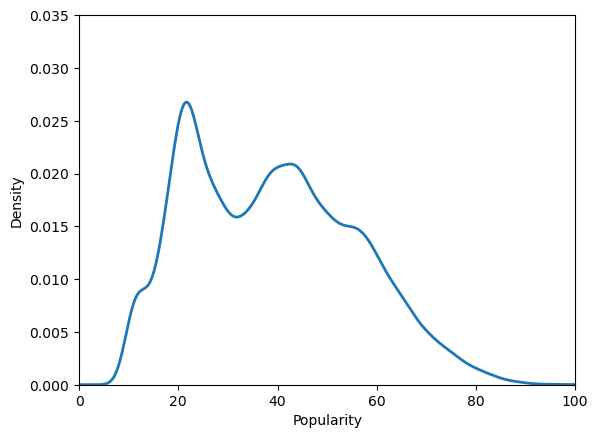

In [73]:
#popularity distribution
df['popularity'].plot(kind='density', linewidth=2)
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.xlim((0, 100))
plt.ylim((0, 0.035))
plt.show()

In [5]:
# handling missing values
print(df.isna().sum())
df = df.dropna()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
# round selected columns
cols_to_round = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[cols_to_round] = df[cols_to_round].round(2)

In [7]:
# remove first column
df = df.iloc[:, 1:]
print(df.head())

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

In [8]:
# remove duplicates, keeping most popular entry
df = df.loc[df.groupby(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'])['popularity'].idxmax()]
print(df.head())

                     track_id                                 artists  \
59310  6hsyfegVY5yklJneM40mWi                              Leila Bela   
59812  38Ogh3rsHba83kXx13gbKs                              Leila Bela   
59775  1HVjSh7scH1PaPiLjy2LEu          Leila Bela;Leila's Opera Class   
16856  5YKCM3jbJ8lqUXUwfU7KwZ  Wolfgang Amadeus Mozart;Ingrid Haebler   
16288  1T5QvLF9lO4HO3OZQbaX9p        Robert Schumann;Pavel Nersessian   

                                              album_name  \
59310                                        Angra Manyu   
59812                                        Angra Manyu   
59775                                        Angra Manyu   
16856                 Mozart: The Complete Piano Sonatas   
16288  Schumann, Poulenc & Others: Piano Works (Live ...   

                                              track_name  popularity  \
59310                             The Exorsism Begins...           0   
59812                                                V-4

In [9]:
# removing songs with low popularity
df = df[df['popularity'] >= 10]
print(len(df))

89453


In [10]:
# unique track IDs
print(df['track_id'].nunique())

74519


In [11]:
# mapping genre counts
genre_count = df['track_genre'].value_counts().to_dict()
df['genre_count'] = df['track_genre'].map(genre_count)
print(df.tail())

                     track_id      artists  \
13245  13hQAhg1owjTpTcI9xQc6c  Mark Farina   
13344  3gFme8BdfTtFHxKmuTnSbj  Mark Farina   
73840  6JbQr97EMFD2D3Ek6gxgt1    Loco Dice   
10935  0LBIf9EFHuxmuNig4JHGZo    Timo Maas   
73617  3Cnz3Bu9Wcw8p3kiBTXTxp   Tale Of Us   

                                              album_name  \
13245                                      Live In Tokyo   
13344                               House of OM (DJ Mix)   
73840                     Amnesia Ibiza - Underground 10   
10935  Crossing Wires 002 - Compiled And Mixed By Tim...   
73617                                 Unity (Voyage Mix)   

                                       track_name  popularity  duration_ms  \
13245              Live In Tokyo - Continuous Mix          11      4339826   
13344  House of Om - Mark Farina - Continuous Mix          11      4447520   
73840         Amnesia Ibiza Underground 10 DJ Mix          17      4563897   
10935      Crossing Wires 002 - Continuous DJ Mix 

In [12]:
# keeping most frequent genre for multi-genre songs
df = df.loc[df.groupby('track_id')['genre_count'].idxmax()]
df['explicit'] = df['explicit'].astype(int)
print(df.head())

                     track_id                   artists          album_name  \
39463  0000vdREvCVMxbQTkS888c                      Rill               Lolly   
73441  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                   X   
51365  000RDCYioLteXcutOjeweY             Jordan Sandhu          Teeje Week   
73649  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner                Zeit   
18342  0017XiMkqbTfF2AUOzlhj6              Chad Daniels  Busy Being Awesome   

                          track_name  popularity  duration_ms  explicit  \
39463                          Lolly          44       160725         1   
73441  Böxig Leise - Pig & Dan Remix          22       515360         0   
51365                     Teeje Week          62       190203         0   
73649                           Tief          19       331240         0   
18342           Thanksgiving Chicken          24       127040         1   

       danceability  energy  key  ...  mode  speechiness  acousticness  \


In [13]:
# form numerical features df
num_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
df_numeric = df[num_features].reset_index(drop=True)
print(df_numeric.head())


   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       160725         1          0.91    0.37    8     -9.84     0   
1       515360         0          0.69    0.56    5    -13.26     0   
2       190203         0          0.68    0.77    0     -3.54     1   
3       331240         0          0.52    0.43    6    -13.61     0   
4       127040         1          0.54    0.78    5     -9.45     0   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0         0.20          0.08              0.00      0.15     0.43  104.04   
1         0.05          0.00              0.18      0.11     0.11  120.00   
2         0.19          0.06              0.00      0.08     0.84  161.72   
3         0.03          0.00              0.72      0.09     0.23  129.97   
4         0.94          0.79              0.00      0.74     0.45  173.91   

   time_signature  popularity  
0               4          44  
1               4          22  
2             

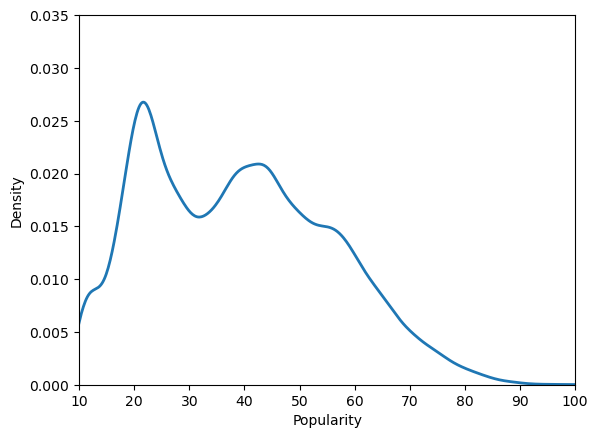

In [14]:
# plot new popularity distribution
df_numeric['popularity'].plot(kind='density', linewidth=2)
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.xlim((10, 100))
plt.ylim((0, 0.035))
plt.show()

In [15]:
# extracting album artist from 'artists' column
df['album_artist'] = df['artists'].str.split(';', expand=True)[0]
print(df.head())

                     track_id                   artists          album_name  \
39463  0000vdREvCVMxbQTkS888c                      Rill               Lolly   
73441  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                   X   
51365  000RDCYioLteXcutOjeweY             Jordan Sandhu          Teeje Week   
73649  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner                Zeit   
18342  0017XiMkqbTfF2AUOzlhj6              Chad Daniels  Busy Being Awesome   

                          track_name  popularity  duration_ms  explicit  \
39463                          Lolly          44       160725         1   
73441  Böxig Leise - Pig & Dan Remix          22       515360         0   
51365                     Teeje Week          62       190203         0   
73649                           Tief          19       331240         0   
18342           Thanksgiving Chicken          24       127040         1   

       danceability  energy  key  ...  speechiness  acousticness  \
39463 

In [16]:
# calculating artist popularity
artist_popularity = {}
for _, row in df.iterrows():
    for artist in row['artists'].split(';'):
        if artist in artist_popularity:
            artist_popularity[artist]['sum'] += row['popularity']
            artist_popularity[artist]['count'] += 1
        else:
            artist_popularity[artist] = {'sum': row['popularity'], 'count': 1}

artist_popularity = {artist: data['sum'] / data['count'] for artist, data in artist_popularity.items()}

In [17]:
# assigning main artist and artist popularity
df['main_artist'] = df['artists'].apply(lambda x: max(x.split(';'), key=lambda a: artist_popularity.get(a, 0)))
df['artist_popularity'] = df['main_artist'].map(artist_popularity).round(2)
print(df.head())


                     track_id                   artists          album_name  \
39463  0000vdREvCVMxbQTkS888c                      Rill               Lolly   
73441  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                   X   
51365  000RDCYioLteXcutOjeweY             Jordan Sandhu          Teeje Week   
73649  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner                Zeit   
18342  0017XiMkqbTfF2AUOzlhj6              Chad Daniels  Busy Being Awesome   

                          track_name  popularity  duration_ms  explicit  \
39463                          Lolly          44       160725         1   
73441  Böxig Leise - Pig & Dan Remix          22       515360         0   
51365                     Teeje Week          62       190203         0   
73649                           Tief          19       331240         0   
18342           Thanksgiving Chicken          24       127040         1   

       danceability  energy  key  ...  instrumentalness  liveness  valence

In [18]:
# assigning genre popularity
df['genre_popularity'] = df.groupby('track_genre')['popularity'].transform('mean').round(2)
print(df.head())

                     track_id                   artists          album_name  \
39463  0000vdREvCVMxbQTkS888c                      Rill               Lolly   
73441  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                   X   
51365  000RDCYioLteXcutOjeweY             Jordan Sandhu          Teeje Week   
73649  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner                Zeit   
18342  0017XiMkqbTfF2AUOzlhj6              Chad Daniels  Busy Being Awesome   

                          track_name  popularity  duration_ms  explicit  \
39463                          Lolly          44       160725         1   
73441  Böxig Leise - Pig & Dan Remix          22       515360         0   
51365                     Teeje Week          62       190203         0   
73649                           Tief          19       331240         0   
18342           Thanksgiving Chicken          24       127040         1   

       danceability  energy  key  ...  liveness  valence   tempo  \
39463 

In [19]:
# assigning album popularity
df['album_popularity'] = df.groupby(['album_name', 'album_artist'])['popularity'].transform('mean').round(2)
print(df.head())

                     track_id                   artists          album_name  \
39463  0000vdREvCVMxbQTkS888c                      Rill               Lolly   
73441  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                   X   
51365  000RDCYioLteXcutOjeweY             Jordan Sandhu          Teeje Week   
73649  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner                Zeit   
18342  0017XiMkqbTfF2AUOzlhj6              Chad Daniels  Busy Being Awesome   

                          track_name  popularity  duration_ms  explicit  \
39463                          Lolly          44       160725         1   
73441  Böxig Leise - Pig & Dan Remix          22       515360         0   
51365                     Teeje Week          62       190203         0   
73649                           Tief          19       331240         0   
18342           Thanksgiving Chicken          24       127040         1   

       danceability  energy  key  ...  valence   tempo  time_signature  \


In [20]:
# creating complete feature dataframe
complete_features = num_features + ['album_popularity', 'artist_popularity', 'genre_popularity']
df_complete = df[complete_features].reset_index(drop=True)
print(df_complete.head())

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       160725         1          0.91    0.37    8     -9.84     0   
1       515360         0          0.69    0.56    5    -13.26     0   
2       190203         0          0.68    0.77    0     -3.54     1   
3       331240         0          0.52    0.43    6    -13.61     0   
4       127040         1          0.54    0.78    5     -9.45     0   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0         0.20          0.08              0.00      0.15     0.43  104.04   
1         0.05          0.00              0.18      0.11     0.11  120.00   
2         0.19          0.06              0.00      0.08     0.84  161.72   
3         0.03          0.00              0.72      0.09     0.23  129.97   
4         0.94          0.79              0.00      0.74     0.45  173.91   

   time_signature  popularity  album_popularity  artist_popularity  \
0               4          44           

In [104]:
df_numeric.to_csv('/Users/ekaterina.sergeeva/Documents/numeric.csv', index=False)
df_complete.to_csv('/Users/ekaterina.sergeeva/Documents/complete.csv', index=False)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
seed = np.random.seed(42)

Only numerical features

In [126]:
numeric = pd.read_csv('/Users/ekaterina.sergeeva/Documents/numeric.csv')
X_numeric, y_numeric = numeric.drop(columns=['popularity']), numeric['popularity']

In [127]:
import numpy as np
from sklearn.model_selection import KFold

class RidgeRegression:
    def __init__(self, alpha=1.0, n_splits=5, random_state=None):
        self.alpha = alpha
        self.n_splits = n_splits
        self.random_state = random_state
        self.weights = None
        self.mse = None
        self.rmse = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.column_stack([np.ones(n_samples), X])
        I = np.identity(n_features + 1)
        I[0][0] = 0
        
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)

        best_score = float("-inf")
        best_weights = None

        mse = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            XTX = np.dot(X_train.T, X_train)
            weights = np.linalg.inv(XTX + self.alpha * I).dot(X_train.T).dot(y_train)

            val_predictions = X_val.dot(weights)
            val_score = np.mean((val_predictions - y_val) ** 2)
            mse.append(val_score)

            if val_score < best_score:
                best_score = val_score
                best_weights = weights

        self.weights = best_weights
        self.mse = np.array(mse)
        self.rmse = self.mse**0.5

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model has not been trained yet. Call the 'fit' method first.")

        X = np.column_stack([np.ones(X.shape[0]), X])
        predictions = X.dot(self.weights)
        return predictions

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
seed = np.random.seed(42)

In [130]:
ridge_reg_numeric = RidgeRegression(alpha=1, n_splits=5, random_state=seed)
ridge_reg_numeric.fit(X_numeric, y_numeric)

print("Initial RMSE with only numerical features:", ridge_reg_numeric.rmse)

Initial RMSE with only numerical features: [16.04 16.06 16.12 16.03 16.09]


In [131]:
alpha_values = []
rmse_values = []
model_weights = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    model = RidgeRegression(alpha=alpha, n_splits=5, random_state=seed)
    model.fit(X_numeric, y_numeric)

    rmse = model.rmse
    weights = model.weights

    alpha_values.append(alpha)
    rmse_values.append(rmse)
    model_weights.append(weights)

alpha_values, rmse_values, model_weights


([0.01, 0.1, 1, 10, 100],
 [array([16.11, 16.05, 16.05, 16.02, 16.1 ]),
  array([16.14, 16.03, 15.99, 16.08, 16.1 ]),
  array([15.94, 16.12, 16.2 , 16.  , 16.07]),
  array([16.11, 16.08, 16.07, 16.02, 16.05]),
  array([16.1 , 16.1 , 16.12, 16.07, 15.96])],
 [None, None, None, None, None])

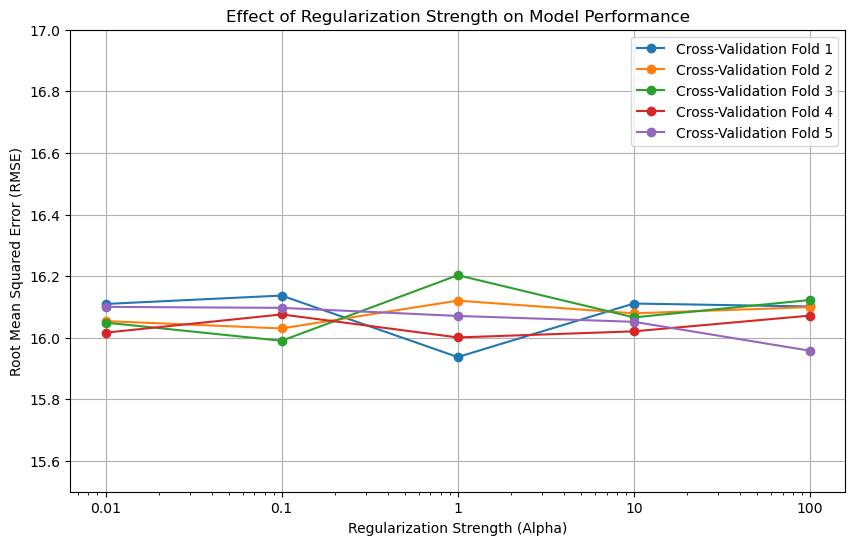

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, rmse_values, marker='o', linestyle='-')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of Regularization Strength on Model Performance")
plt.xscale('log')  
plt.xticks(alpha_values, alpha_values)
plt.legend(['Cross-Validation Fold 1', 'Cross-Validation Fold 2', 'Cross-Validation Fold 3', 'Cross-Validation Fold 4', 'Cross-Validation Fold 5'])
plt.grid(True)
plt.ylim((15.5, 17))
plt.show()

All features

In [132]:
data_complete = pd.read_csv('/Users/ekaterina.sergeeva/Documents/complete.csv')
X_complete, y_complete = data_complete.drop(columns=['popularity']), data_complete['popularity']

In [133]:
ridge_reg_complete = RidgeRegression(alpha=1, n_splits=5, random_state=seed)
ridge_reg_complete.fit(X_complete, y_complete)

print("Root Mean Squared Error (RMSE):", ridge_reg_complete.rmse)

Root Mean Squared Error (RMSE): [3.42 3.46 3.42 3.48 3.4 ]


In [134]:
alphas_complete = []
rmses_complete = []
coefficients_complete = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge_reg_complete = RidgeRegression(alpha=alpha, n_splits=5, random_state=seed)
    ridge_reg_complete.fit(X_numeric, y_numeric)

    rmse_complete = ridge_reg_complete.rmse
    coeffs_complete = ridge_reg_complete.weights

    alphas_complete.append(alpha)
    rmses_complete.append(rmse_complete)
    coefficients_complete.append(coeffs_complete)

alphas_complete, rmses_complete, coefficients_complete

([0.01, 0.1, 1, 10, 100],
 [array([16.03, 16.02, 16.16, 15.92, 16.19]),
  array([16.08, 16.06, 16.04, 15.99, 16.16]),
  array([16.06, 16.06, 16.14, 16.01, 16.06]),
  array([16.01, 16.03, 15.98, 16.11, 16.2 ]),
  array([16.07, 16.02, 16.01, 16.05, 16.19])],
 [None, None, None, None, None])

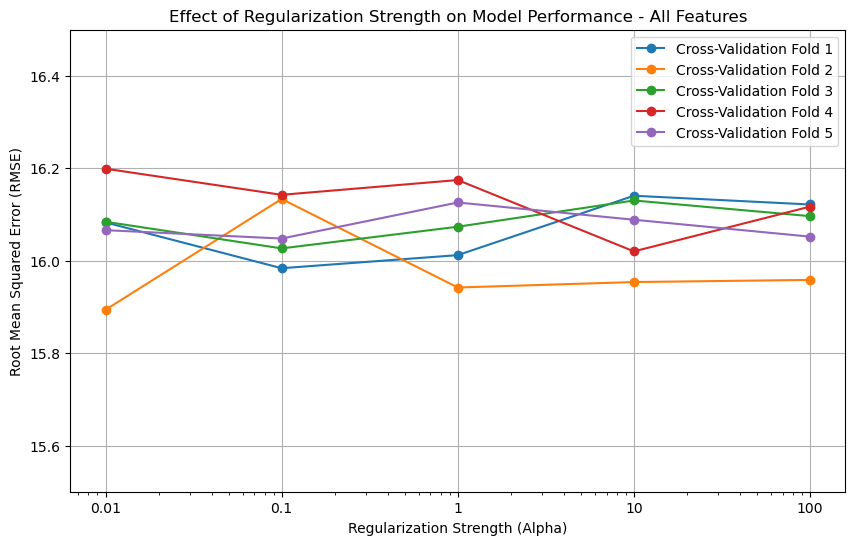

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(alphas_complete, rmses_complete, marker='o', linestyle='-')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of Regularization Strength on Model Performance - All Features")
plt.xscale('log')  
plt.xticks(alphas_complete, alphas_complete)
plt.legend(['Cross-Validation Fold 1', 'Cross-Validation Fold 2', 'Cross-Validation Fold 3', 'Cross-Validation Fold 4', 'Cross-Validation Fold 5'])
plt.grid(True)
plt.ylim((15.5, 16.5))
plt.show()

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

LASSO REGRESSION

In [146]:
data_complete = pd.read_csv('/Users/ekaterina.sergeeva/Documents/complete.csv')
X_complete = data_complete.drop(columns=['popularity'])
y_complete = data_complete['popularity']

In [147]:
scaler = StandardScaler()
X_complete_scaled = scaler.fit_transform(X_complete)

In [148]:
alphas_to_try = [0.01, 0.1, 1, 10, 100]
rmse_per_fold = []

In [149]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

In [150]:
rmse_dict = {f'Fold {i+1}': [] for i in range(n_splits)}

for alpha in alphas_to_try:
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_complete), start=1):
        X_train, X_test = X_complete.iloc[train_idx], X_complete.iloc[test_idx]
        y_train, y_test = y_complete.iloc[train_idx], y_complete.iloc[test_idx]
        
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        rmse_dict[f'Fold {fold}'].append(rmse)

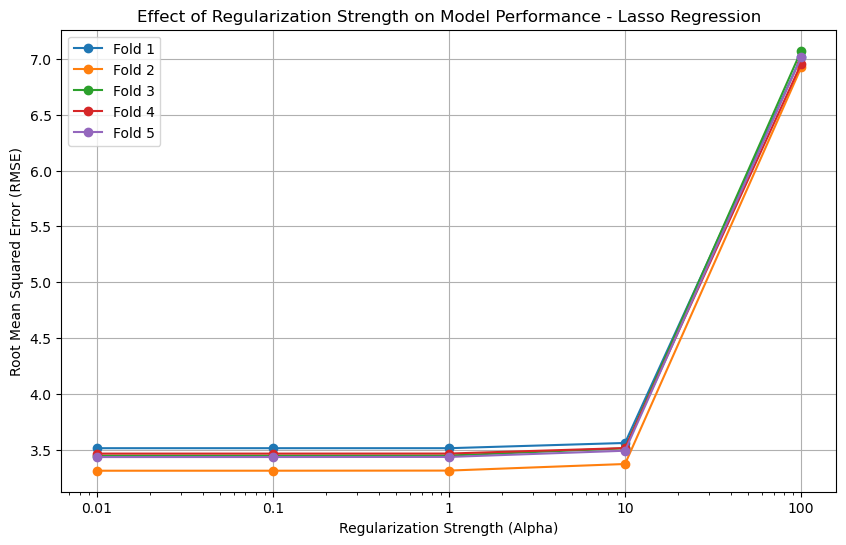

In [151]:
plt.figure(figsize=(10, 6))
for fold, rmse_values in rmse_dict.items():
    plt.plot(alphas_to_try, rmse_values, marker='o', linestyle='-', label=fold)

plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of Regularization Strength on Model Performance - Lasso Regression")
plt.xscale('log')  
plt.xticks(alphas_to_try, alphas_to_try)
plt.legend()
plt.grid(True)
plt.show()

LINEAR REGRESSION

In [152]:
from sklearn.linear_model import LinearRegression

rmse_dict2 = {f'Fold {i+1}': [] for i in range(n_splits)}

In [153]:
for fold, (train_idx, test_idx) in enumerate(kf.split(X_complete), start=1):
    X_train, X_test = X_complete.iloc[train_idx], X_complete.iloc[test_idx]
    y_train, y_test = y_complete.iloc[train_idx], y_complete.iloc[test_idx]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    y_pred = lin_reg.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmse_dict2[f'Fold {fold}'].append(rmse)

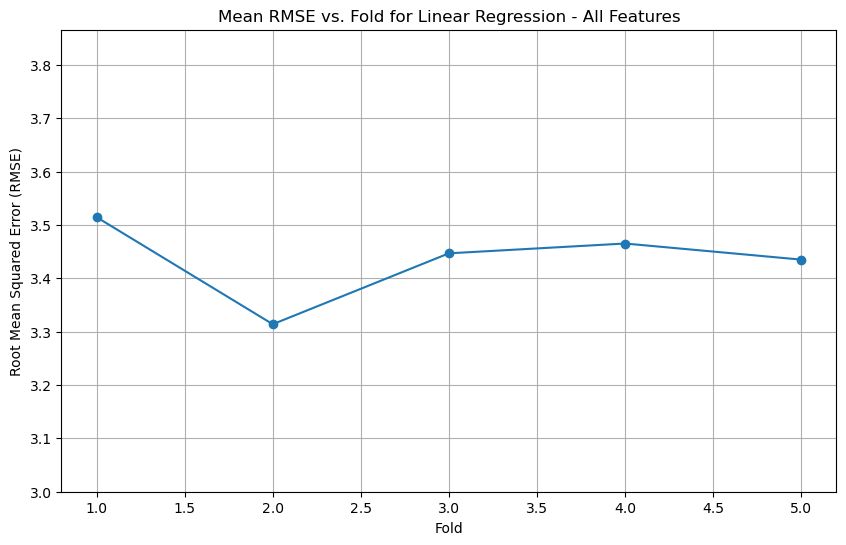

In [158]:
plt.figure(figsize=(10, 6))
mean_rmse_values = [np.mean(rmses) for rmses in rmse_dict2.values()]
plt.plot(range(1, n_splits + 1), mean_rmse_values, linestyle='-', marker='o')

plt.xlabel("Fold")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Mean RMSE vs. Fold for Linear Regression - All Features")
plt.grid(True)
plt.ylim((3, max(mean_rmse_values) * 1.1))  
plt.show()